# Mesa ABM of the Keep Threshold Relay

### Simulation notes and instructions

Notes:
* Nodes are created simulataneously using the Mesa SimultaneousActivation scheduler
* The nodes go through a bootstrap phase based on Antonio's diagram. They can only form groups if they are in the mainloop forked state.
* Relay requests are currently bernoulli trials
* Each step could be assumed to be a block
* Singature events are modeled by default as asynchronous with a step delay to mimick the block delay
* We assume that 1 node = 1 staker

Instructions:
1. Change variables
2. Click on the restart and run kernel icon for ipython


In [1]:
import random
import datetime
import numpy as np
import pandas as pd
import agent
import model
import matplotlib.pyplot as plt

**Initialize Variables**

In [2]:
# Group & Signature Parameters
group_size = 100 # number of virtual stakers in a group - nodes to stakers is a 1-many relationship
nodes = 200 # total number of nodes (assume 1 node = 1 staker)
active_group_threshold =10 # number of active groups to bootstrap at start
min_nodes = 20 # min number of nodes that must be online so as to increase the likelihood of lower max ownership
max_malicious_threshold = 40 # % of malicious node ownership needed to sign
signature_delay = 2 # lambda for poisson distribution used to generate a delay before the signature is executed
group_expiry = 14 # number of steps after which a group expires
Misbehaving_nodes = 50 # percent of nodes misbehaving during dkg
dkg_block_delay = 3 # blocks needed to run DKG
compromised_threshold = 0.25 # malicious + offline > threshold = compromised

#Node parameters
node_failure_percent = 10 # % of times nodes fail and have to reconnect
node_death_percent = 10 # % of time nodes fail and do not reconnect
node_connection_delay = 3 # max delay for a node to connect or reconnect after failure
node_mainloop_connection_delay = 3 # max delay for a node to fork or refork mainloop after failure

#Model Parameters
log_filename = 'master_sim.log'
run_number = 0
steps = 200 #blocks

Text(0.5, 1.0, 'Virtual Staker Cumulative Distribution')

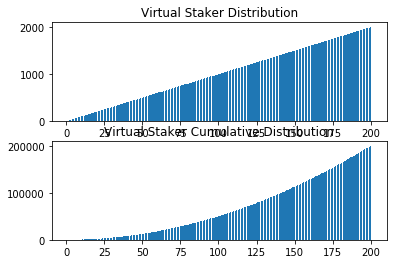

In [3]:
# Pre-processing Staker distributions
# Linear y = m * (x + 1) since indices start from 0
ticket_distribution = np.zeros(nodes) 

for i in range (0, nodes):
    ticket_distribution[i] =  10 * (i + 1) # m = 50 gives max y as 1000 which is 2% of 50000

x = np.linspace(1,nodes,nodes)
plt.subplot(2, 1, 1)
plt.bar(x, ticket_distribution)
plt.title("Virtual Staker Distribution")

cdf_L02=model.create_cdf(nodes,ticket_distribution)
plt.subplot(2, 1, 2)
plt.bar(x, cdf_L02)
plt.title("Virtual Staker Cumulative Distribution")

In [4]:
beacon_model = model.Beacon_Model(nodes, ticket_distribution, 
                                  active_group_threshold, 
                                  group_size, 
                                  max_malicious_threshold, 
                                  group_expiry, 
                                  node_failure_percent, 
                                  node_death_percent, 
                                  signature_delay,
                                  min_nodes,
                                  node_connection_delay,
                                  node_mainloop_connection_delay,
                                  log_filename,
                                  run_number,
                                  Misbehaving_nodes,
                                  dkg_block_delay,
                                  compromised_threshold)

In [5]:
active_group_size = []
signature_failures = []
for i in range (steps):
    beacon_model.step()

model_data = beacon_model.datacollector.get_model_vars_dataframe()
agent_data = beacon_model.datacollector.get_agent_vars_dataframe()

step # = 0##############################################
step # = 1##############################################


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
step # = 2##############################################
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
step # = 3##############################################
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group list length = 0
active group lis

active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
step # = 12##############################################
active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
active group = 0
active group = 1
active group = 2
active group = 3
ac

active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active group = 7
active group = 8
active group = 9
active group = 10
active group list length = 11
active group = 0
active group = 1
active group = 2
active group = 3
active group = 4
active group = 5
active group = 6
active gr

active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group list length = 2
active group = 11
active group = 12
active group = 13
active group list length = 3
active group = 11
active group = 12
active group = 13
active group list 

active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group list length = 7
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group list length = 7
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group list length = 7
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group list length = 7
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group list length = 7
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group list length = 7
active group = 11
active group = 12
active group = 13
active group = 1

active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group list length = 9
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group list length = 10
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group list length = 10
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group list length = 10
step # = 31##############################################
active group = 11
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group 

active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group list length = 10
step # = 34##############################################
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group list length = 10
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group list length = 10
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group list length = 10
active group = 12
active group = 13
active group = 14
active group = 15
active group = 16
active group

active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group list length = 10
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group list length = 10
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group list length = 10
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group list length = 10
active group = 14
active group = 15
active group = 16
active group = 17
active group = 18
active group = 19
active group = 20
active group = 21
active group = 2

active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 8
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 8
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 8
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 8
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 8
active group = 18
active group = 19
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active gr

active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 6
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 6
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 6
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 6
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 6
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 6
active group = 20
active group = 21
active group = 22
active group = 23
active group = 24
active group = 25
active group list length = 6
active group = 20
active group = 21
activ

active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group = 24
active group = 25
active group = 26
active group list length = 5
active group = 22
active group = 23
active group

active group = 27
active group = 28
active group list length = 6
active group = 23
active group = 24
active group = 25
active group = 26
active group = 27
active group = 28
active group list length = 6
active group = 23
active group = 24
active group = 25
active group = 26
active group = 27
active group = 28
active group list length = 6
active group = 23
active group = 24
active group = 25
active group = 26
active group = 27
active group = 28
active group list length = 6
active group = 23
active group = 24
active group = 25
active group = 26
active group = 27
active group = 28
active group list length = 6
active group = 23
active group = 24
active group = 25
active group = 26
active group = 27
active group = 28
active group list length = 6
active group = 23
active group = 24
active group = 25
active group = 26
active group = 27
active group = 28
active group list length = 6
active group = 23
active group = 24
active group = 25
active group = 26
active group = 27
active group = 28
activ

active group = 25
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group list length = 6
active group = 25
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group list length = 6
active group = 25
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group list length = 6
active group = 25
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group list length = 6
active group = 25
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group list length = 6
active group = 25
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group list length = 6
active group = 25
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group list length = 6
active group = 25
active group = 26
activ

active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group list length = 6
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group list length = 6
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group list length = 6
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group list length = 6
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group list length = 6
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group list length = 6
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group list length = 6
active group = 26
active group = 27
activ

step # = 59##############################################
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 8
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 8
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 8
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 8
active group = 26
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 8
active group = 26
active group = 27
active group = 28
active group = 29
activ

active group = 31
active group = 32
active group = 33
active group list length = 7
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 7
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 7
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 7
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group list length = 7
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group list length = 8
active group = 27
active group = 28
active group = 29
active group = 30
active group = 31
active group = 32
active group = 3

active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group list length = 9
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group list length = 9
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group list length = 9
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group list length = 9
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group list length = 9
active group = 29
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active gr

active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 9
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 9
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 9
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 9
active group = 30
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 9
active group = 30
active group = 31
active gr

active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active gr

active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group list length = 8
active group = 31
active group = 32
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active gr

active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group = 39
active group list length = 7
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group = 39
active group list length = 7
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group = 39
active group list length = 7
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group = 39
active group list length = 7
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group = 39
active group list length = 7
active group = 33
active group = 34
active group = 35
active group = 36
active group = 37
active group = 38
active group = 39
active group list length = 7
active group = 33
active group = 34
active group = 35
active group = 3

active group = 39
active group = 40
active group = 41
active group list length = 6
active group = 36
active group = 37
active group = 38
active group = 39
active group = 40
active group = 41
active group list length = 6
active group = 36
active group = 37
active group = 38
active group = 39
active group = 40
active group = 41
active group list length = 6
active group = 36
active group = 37
active group = 38
active group = 39
active group = 40
active group = 41
active group list length = 6
active group = 36
active group = 37
active group = 38
active group = 39
active group = 40
active group = 41
active group list length = 6
active group = 36
active group = 37
active group = 38
active group = 39
active group = 40
active group = 41
active group list length = 6
active group = 36
active group = 37
active group = 38
active group = 39
active group = 40
active group = 41
active group list length = 6
active group = 36
active group = 37
active group = 38
active group = 39
active group = 40
activ

active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list length = 4
active group = 39
active group = 40
active group = 41
active group = 42
active group list l

step # = 82##############################################
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list l

active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group = 41
active group = 42
active group = 43
active group list length = 5
active group = 39
active group = 40
active group

active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list length = 4
active group = 42
active group = 43
active group = 44
active group = 45
active group list l

active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group list length = 5
active group = 43
active group = 44
active group

active group = 47
active group = 48
active group = 49
active group list length = 7
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group list length = 7
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group list length = 7
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group list length = 7
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group list length = 7
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group list length = 7
active group = 43
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group lis

active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group = 50
active group list length = 7
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group = 50
active group list length = 7
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group = 50
active group list length = 7
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group = 50
active group list length = 7
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group = 50
active group list length = 7
active group = 44
active group = 45
active group = 46
active group = 47
active group = 48
active group = 49
active group = 50
active group list length = 7
active group = 44
active group = 45
active group = 46
active group = 4

<function matplotlib.pyplot.show(*args, **kw)>

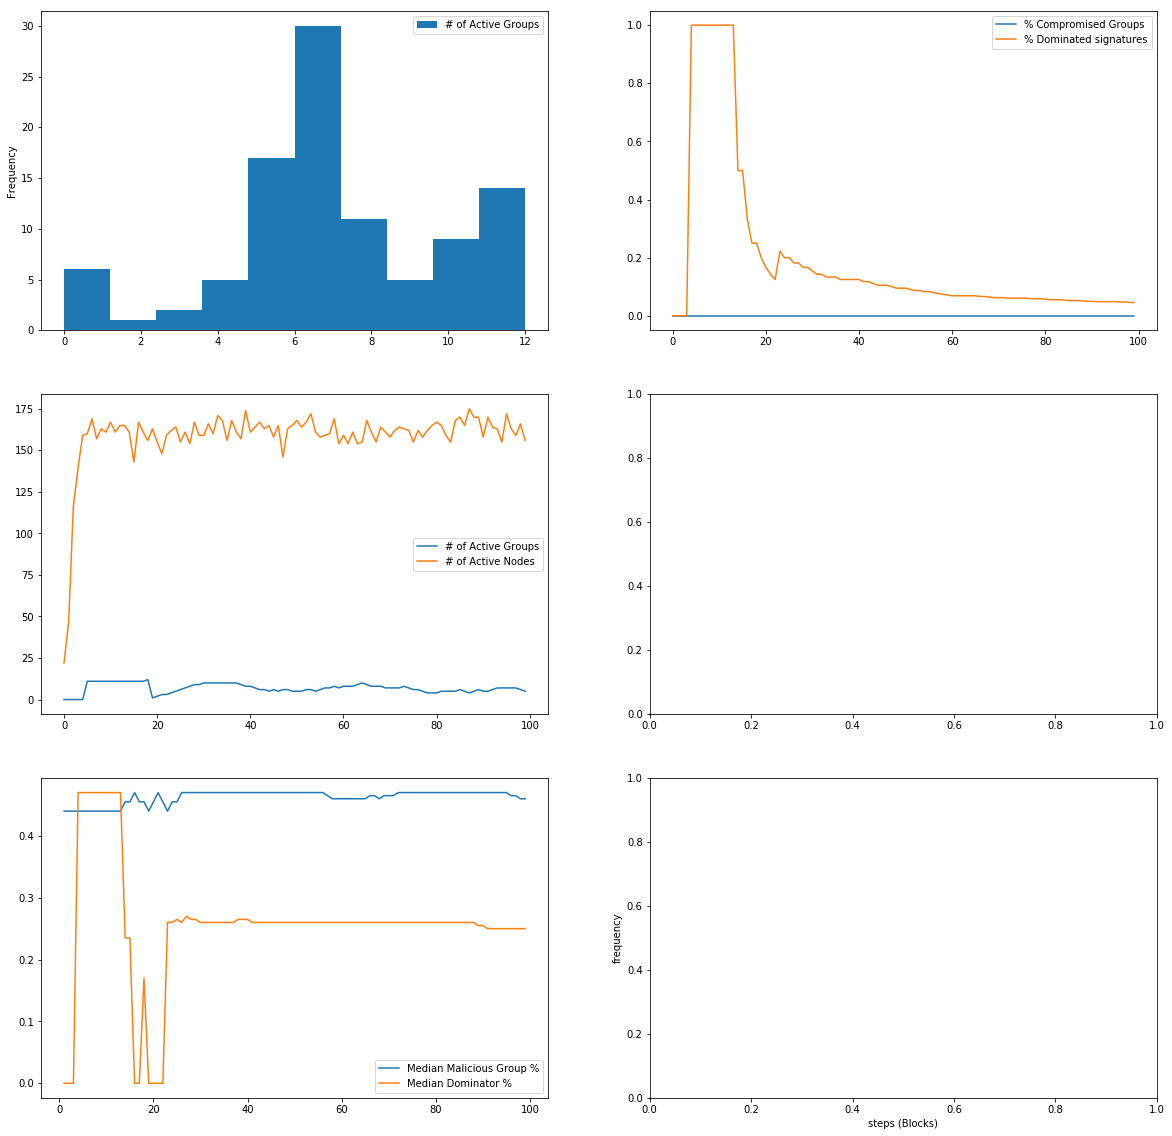

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (20,20))

#plt.figure(figsize = (10,10))
#plt.subplot(3, 1, 1)
model_data.plot(kind='hist', ax = axes[0,0], legend = True, y = ['# of Active Groups'])
plt.xlabel("# of active groups")
plt.ylabel("frequency")

model_data.plot(kind='line', ax = axes[1,0], legend = True, y = ['# of Active Groups', '# of Active Nodes' ])
plt.xlabel("steps (Blocks)")
plt.show

model_data.plot(kind='line', ax = axes[2,0], legend = True, y = ['Median Malicious Group %','Median Dominator %'])
plt.xlabel("steps (Blocks)")
plt.show


model_data.plot(kind='line', ax = axes[0,1], legend = True, y = ['% Compromised Groups','% Dominated signatures'])
plt.xlabel("steps (Blocks)")
plt.show


* % of signatures dominated

In [7]:

agent_data[agent_data['Type']=='group']


Type_ID   Type Node Status (Connection_Mainloop_Stake)   Status  \
Step AgentID                                                                    
2    200            0  group                                    None      dkg   
     201            1  group                                    None      dkg   
     202            2  group                                    None      dkg   
     203            3  group                                    None      dkg   
     204            4  group                                    None      dkg   
     205            5  group                                    None      dkg   
     206            6  group                                    None      dkg   
     207            7  group                                    None      dkg   
     208            8  group                                    None      dkg   
     209            9  group                                    None      dkg   
     211           10  group                                    None      dkg   
3    200            0  group                                    None      dkg   
     201            1  group                                    None      dkg   
     202            2  group                                    None      dkg   
     203            3  group                                    None      dkg   
     204            4  group                                    None      dkg   
     205            5  group                                    None      dkg   
     206            6  group                                    None      dkg   
     207            7  group                                    None      dkg   
     208            8  group                                    None      dkg   
     209            9  group                                    None      dkg   
     211           10  group                                    None      dkg   
4    200            0  group                                    None      dkg   
     201            1  group                                    None      dkg   
     202            2  group                                    None      dkg   
     203            3  group                                    None      dkg   
     204            4  group                                    None      dkg   
     205            5  group                                    None      dkg   
     206            6  group                                    None      dkg   
     207            7  group                                    None      dkg   
...               ...    ...                                     ...      ...   
100  239           24  group                                    None  expired   
     241           25  group                                    None  expired   
     243           26  group                                    None  expired   
     245           27  group                                    None  expired   
     247           28  group                                    None  expired   
     249           29  group                                    None  expired   
     251           30  group                                    None  expired   
     253           31  group                                    None  expired   
     255           32  group                                    None  expired   
     257           33  group                                    None  expired   
     259           34  group                                    None  expired   
     261           35  group                                    None  expired   
     263           36  group                                    None  expired   
     265           37  group                                    None  expired   
     267           38  group                                    None  expired   
     269           39  group                                    None  expired   
     271           40  group                 

In [8]:
model_data

,# of Active Groups,# of Active Nodes,Median Malicious Group %,% Compromised Groups,Median Dominator %,% Dominated signatures
0,0,22,NaN,0.0,NaN,0.000000
1,0,47,0.440,0.0,0.000,0.000000
2,0,116,0.440,0.0,0.000,0.000000
3,0,139,0.440,0.0,0.000,0.000000
4,0,159,0.440,0.0,0.470,1.000000
5,11,160,0.440,0.0,0.470,1.000000
6,11,169,0.440,0.0,0.470,1.000000
7,11,157,0.440,0.0,0.470,1.000000
8,11,163,0.440,0.0,0.470,1.000000
9,11,161,0.440,0.0,0.470,1.000000
